In [2]:
import pandas as pd

train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

train_df['text_length'] = train_df['tweet'].apply(len)

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

train_df['cleaned_tweet'] = train_df['tweet'].apply(preprocess_text)
test_df['cleaned_tweet'] = test_df['tweet'].apply(preprocess_text)

original_train_df = train_df.copy()

print(train_df.head())
print(test_df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orkunkinay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/orkunkinay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/orkunkinay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   id  label                                              tweet  text_length  \
0   1      0   @user when a father is dysfunctional and is s...          102   
1   2      0  @user @user thanks for #lyft credit i can't us...          122   
2   3      0                                bihday your majesty           21   
3   4      0  #model   i love u take with u all the time in ...           86   
4   5      0             factsguide: society now    #motivation           39   

                                       cleaned_tweet  
0  father dysfunctional selfish drag kid dysfunct...  
1  thanks lyft credit cant use cause dont offer w...  
2                                     bihday majesty  
3                        model love u take u time ur  
4                      factsguide society motivation  
      id                                              tweet  \
0  31963  #studiolife #aislife #requires #passion #dedic...   
1  31964   @user #white #supremacists want everyone to s...   


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

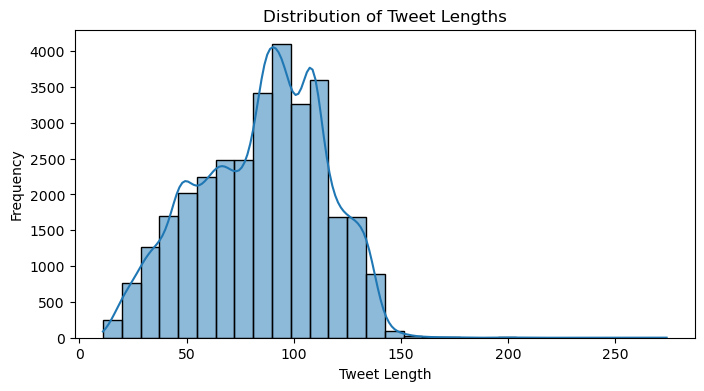

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

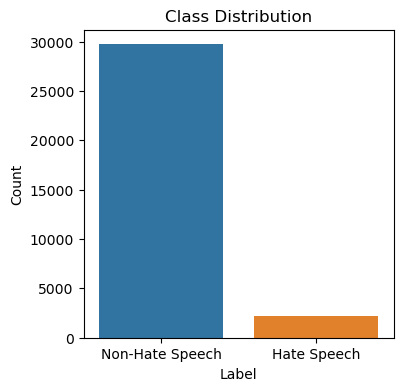

In [10]:
plt.figure(figsize=(4, 4))
sns.countplot(x='label', data=train_df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Hate Speech', 'Hate Speech'])
plt.show()

In [18]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

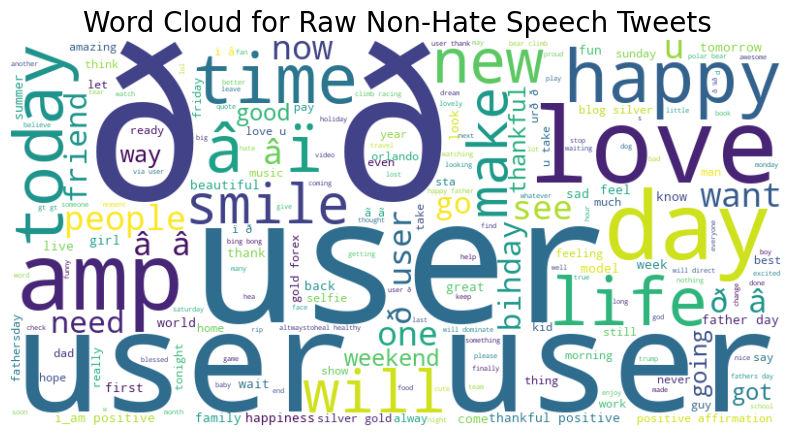

In [17]:
raw_non_hate_speech_text = ' '.join(train_df[train_df['label'] == 0]['tweet'])
raw_hate_speech_text = ' '.join(train_df[train_df['label'] == 1]['tweet'])

generate_wordcloud(raw_non_hate_speech_text, 'Word Cloud for Raw Non-Hate Speech Tweets')

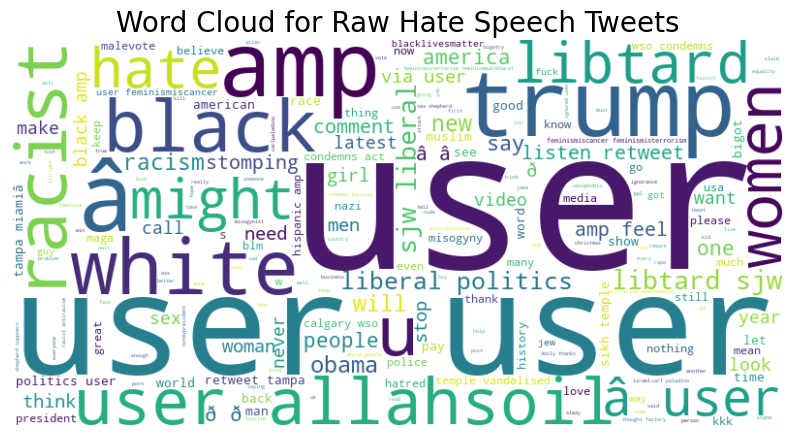

In [19]:
generate_wordcloud(raw_hate_speech_text, 'Word Cloud for Raw Hate Speech Tweets')

## The tweets must be cleaned as can be seen from the word cloud.

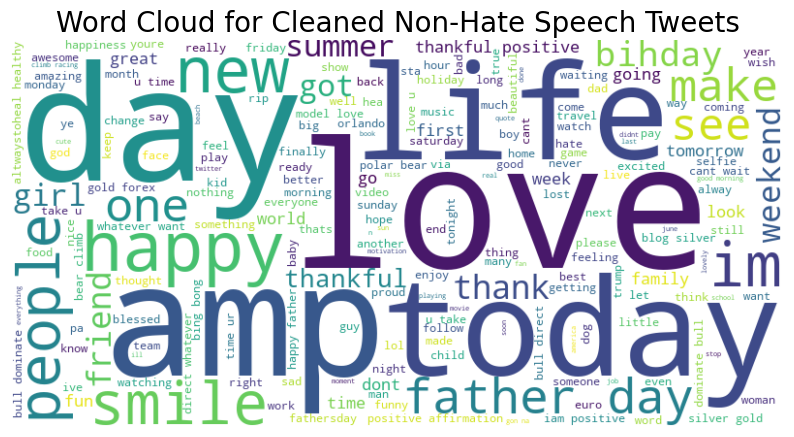

In [27]:
# Combine all tweets into a single string for each class
non_hate_speech_text = ' '.join(train_df[train_df['label'] == 0]['cleaned_tweet'])
hate_speech_text = ' '.join(train_df[train_df['label'] == 1]['cleaned_tweet'])

generate_wordcloud(non_hate_speech_text, 'Word Cloud for Cleaned Non-Hate Speech Tweets')

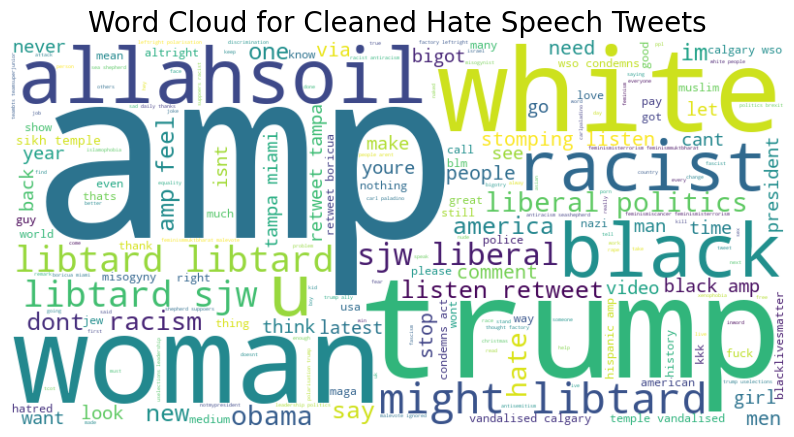

In [28]:
generate_wordcloud(hate_speech_text, 'Word Cloud for Cleaned Hate Speech Tweets')

In [20]:
stats = train_df['text_length'].describe()
print("Statistical Analysis of Tweet Lengths:\n", stats)

def get_common_words(text, n=20):
    tokens = text.split()
    counter = Counter(tokens)
    return counter.most_common(n)

common_words_non_hate = get_common_words(non_hate_speech_text)
common_words_hate = get_common_words(hate_speech_text)

Statistical Analysis of Tweet Lengths:
 count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: text_length, dtype: float64


In [21]:
print("\nCommon Words in Non-Hate Speech Tweets:\n", common_words_non_hate)
print("\nCommon Words in Hate Speech Tweets:\n", common_words_hate)


Common Words in Non-Hate Speech Tweets:
 [('day', 2797), ('love', 2745), ('happy', 1679), ('u', 1578), ('amp', 1325), ('life', 1221), ('time', 1205), ('im', 1112), ('today', 1069), ('get', 949), ('like', 948), ('positive', 932), ('thankful', 925), ('father', 919), ('new', 917), ('bihday', 856), ('good', 820), ('smile', 812), ('make', 804), ('people', 790)]

Common Words in Hate Speech Tweets:
 [('amp', 283), ('trump', 216), ('white', 153), ('libtard', 149), ('black', 146), ('like', 140), ('woman', 120), ('racist', 109), ('politics', 97), ('people', 95), ('liberal', 92), ('allahsoil', 92), ('u', 89), ('might', 77), ('sjw', 74), ('new', 71), ('hate', 69), ('obama', 68), ('retweet', 67), ('dont', 67)]
